# ***Part 1***

In [28]:
import pandas as pd
import random
import time
import math

df = pd.read_csv('housing.csv')
df.isna().sum()
df = df.dropna()

We can see there were 207 rows of NA vlues in number of bedrooms so we have simply droppd those rows

Task at hand
*   convert categorical columns into numeric columns.This includes the column `ocean_proximity`

In [29]:
if 'ocean_proximity' in df.columns:
    df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [30]:
# Split features and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Normalize features (important for gradient descent)
X = (X - X.mean()) / X.std()

# Convert to lists of lists for pure Python compatibility
X_list = X.values.tolist()
y_list = y.values.tolist()

In [31]:
import random

def train_val_split(X, y, test_size=0.2, seed=40):
    combined = list(zip(X, y))
    random.seed(seed)
    random.shuffle(combined)
    X[:], y[:] = zip(*combined)
    split_idx = int(len(X) * (1 - test_size))
    return X[:split_idx], X[split_idx:], y[:split_idx], y[split_idx:]


    return X_train, X_val, y_train, y_val

X_train, X_val, y_train, y_val = train_val_split(X_list, y_list)

In [32]:
def predict(X, weights):
    return [weights[0] + sum(w * x for w, x in zip(weights[1:], row)) for row in X]

def compute_loss(y_true, y_pred):
    return sum((yt - yp) ** 2 for yt, yp in zip(y_true, y_pred)) / len(y_true)

def gradient_descent(X, y, lr=0.01, epochs=500):
    n_samples, n_features = len(X), len(X[0])
    weights = [0.0] * (n_features + 1)
    loss_history = []

    for epoch in range(epochs):
        y_pred = predict(X, weights)
        gradients = [0.0] * len(weights)

        for i in range(n_samples):
            error = y_pred[i] - y[i]
            gradients[0] += error
            for j in range(n_features):
                gradients[j + 1] += error * X[i][j]

        gradients = [g / n_samples for g in gradients]

        for i in range(len(weights)):
            weights[i] -= lr * gradients[i]

        loss = compute_loss(y, predict(X, weights))
        loss_history.append(loss)

        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}: Loss = {loss:.2f}")

    return weights, loss_history


In [33]:
def mean_absolute_error(y_true, y_pred):
    return sum(abs(yt - yp) for yt, yp in zip(y_true, y_pred)) / len(y_true)

def root_mean_squared_error(y_true, y_pred):
    mse = sum((yt - yp) ** 2 for yt, yp in zip(y_true, y_pred)) / len(y_true)
    return math.sqrt(mse)

def r2_score(y_true, y_pred):
    mean_y = sum(y_true) / len(y_true)
    ss_total = sum((yt - mean_y) ** 2 for yt in y_true)
    ss_res = sum((yt - yp) ** 2 for yt, yp in zip(y_true, y_pred))
    return 1 - ss_res / ss_total

In [34]:
start_time = time.time()
weights, loss_history = gradient_descent(X_train, y_train, lr=0.01, epochs=500)
train_time = time.time() - start_time

# Predictions
train_preds = predict(X_train, weights)
val_preds = predict(X_val, weights)

# Metrics
train_mae = mean_absolute_error(y_train, train_preds)
train_rmse = root_mean_squared_error(y_train, train_preds)
train_r2 = r2_score(y_train, train_preds)

val_mae = mean_absolute_error(y_val, val_preds)
val_rmse = root_mean_squared_error(y_val, val_preds)
val_r2 = r2_score(y_val, val_preds)


Epoch 100: Loss = 11634403863.06
Epoch 200: Loss = 6013465706.38
Epoch 300: Loss = 5218013590.98
Epoch 400: Loss = 5064120015.98
Epoch 500: Loss = 5005703712.65


In [35]:
print("\n--- Training Time ---")
print(f"{train_time:.2f} seconds")

print("\n--- Training Metrics ---")
print(f"MAE: {train_mae:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R²: {train_r2:.4f}")

print("\n--- Validation Metrics ---")
print(f"MAE: {val_mae:.2f}")
print(f"RMSE: {val_rmse:.2f}")
print(f"R²: {val_r2:.4f}")


--- Training Time ---
58.88 seconds

--- Training Metrics ---
MAE: 51007.40
RMSE: 70751.00
R²: 0.6284

--- Validation Metrics ---
MAE: 50467.59
RMSE: 69183.04
R²: 0.6242


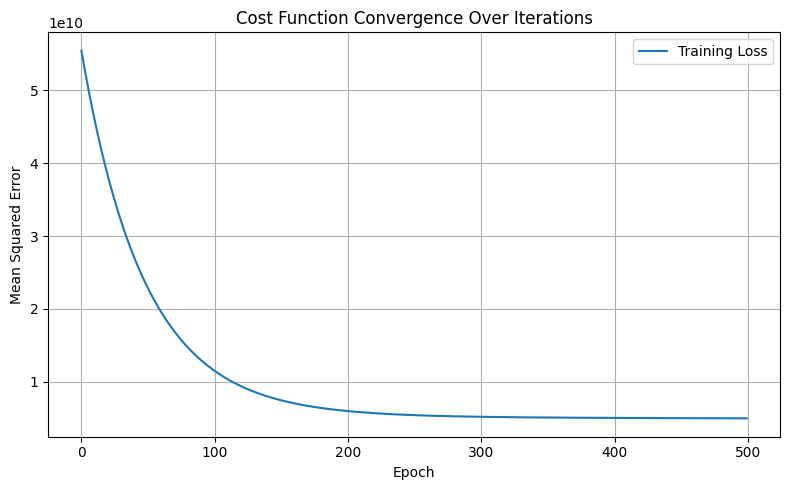

In [36]:
import matplotlib.pyplot as plt

# Plot the cost function's convergence
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("Cost Function Convergence Over Iterations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Part 2**

In [56]:
import numpy as np

In [57]:
# same as Part 1
df = pd.read_csv('housing.csv')
df = df.dropna()
if 'ocean_proximity' in df.columns:
    df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Features and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value'].values.reshape(-1, 1)

# Normalize features (mean 0, std 1)
X_norm = (X - X.mean()) / X.std()
X_norm = X_norm.values  # convert to numpy array


In [58]:
def train_val_split_np(X, y, test_size=0.2, seed=40):
    np.random.seed(seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_idx = int(X.shape[0] * (1 - test_size))
    train_idx, val_idx = indices[:split_idx], indices[split_idx:]
    return X[train_idx], X[val_idx], y[train_idx], y[val_idx]

X_train, X_val, y_train, y_val = train_val_split_np(X_norm, y)

In [59]:
m_train = X_train.shape[0]
m_val = X_val.shape[0]
X_train_b = np.hstack([np.ones((m_train, 1)), X_train])  # shape (m_train, n+1)
X_val_b = np.hstack([np.ones((m_val, 1)), X_val])

# Initialize weights to zeros (same as Part 1)
n_features = X_train_b.shape[1]
theta = np.zeros((n_features, 1))

# Hyperparameters
alpha = 0.01
epochs = 500

In [60]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# Vectorized gradient descent
def gradient_descent(X, y, theta, lr, epochs):
    m = y.shape[0]
    loss_history = []
    for epoch in range(epochs):
        predictions = X.dot(theta)
        gradients = (1/m) * X.T.dot(predictions - y)
        theta = theta - lr * gradients
        cost = compute_cost(X, y, theta)
        loss_history.append(cost)
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}: Loss = {cost:.2f}")
    return theta, loss_history

In [61]:
# Start training and timing
start_time = time.time()
theta_final, loss_history = gradient_descent(X_train_b, y_train, theta, alpha, epochs)
train_time = time.time() - start_time

# Predictions helper
def predict(X, theta):
    return X.dot(theta)

# Predict on train and validation sets
train_preds = predict(X_train_b, theta_final)
val_preds = predict(X_val_b, theta_final)

Epoch 100: Loss = 5807081284.58
Epoch 200: Loss = 2981878443.51
Epoch 300: Loss = 2579700277.61
Epoch 400: Loss = 2502862900.09
Epoch 500: Loss = 2475026359.01


In [62]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res/ss_tot

train_mae = mean_absolute_error(y_train, train_preds)
train_rmse = root_mean_squared_error(y_train, train_preds)
train_r2 = r2_score(y_train, train_preds)

val_mae = mean_absolute_error(y_val, val_preds)
val_rmse = root_mean_squared_error(y_val, val_preds)
val_r2 = r2_score(y_val, val_preds)

In [63]:
print("\n--- Training Time ---")
print(f"{train_time:.2f} seconds")

print("\n--- Training Metrics ---")
print(f"MAE: {train_mae:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R²: {train_r2:.4f}")

print("\n--- Validation Metrics ---")
print(f"MAE: {val_mae:.2f}")
print(f"RMSE: {val_rmse:.2f}")
print(f"R²: {val_r2:.4f}")


--- Training Time ---
0.23 seconds

--- Training Metrics ---
MAE: 50763.92
RMSE: 70356.61
R²: 0.6300

--- Validation Metrics ---
MAE: 51639.05
RMSE: 70975.48
R²: 0.6158


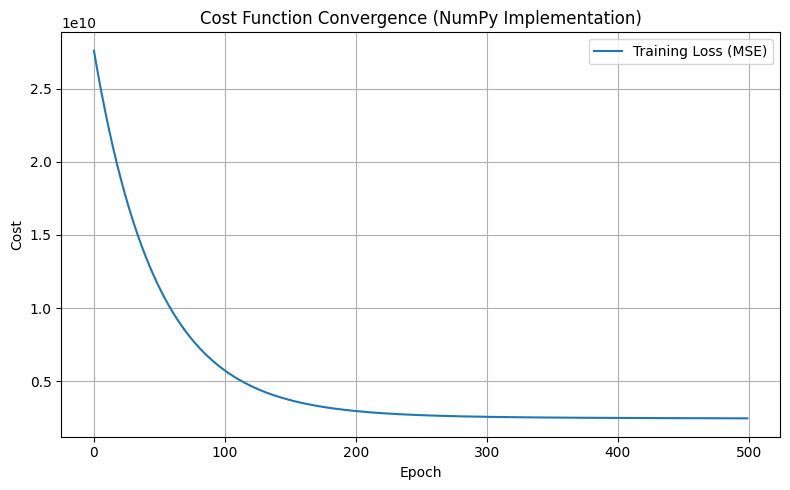

In [64]:
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label="Training Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost Function Convergence (NumPy Implementation)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Part 3**

In [65]:
import pandas as pd
import numpy as np
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess data (same as before)
df = pd.read_csv('housing.csv')
df = df.dropna()
if 'ocean_proximity' in df.columns:
    df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

X = df.drop('median_house_value', axis=1)
y = df['median_house_value'].values.reshape(-1, 1)

# Normalize features (same as before)
X_norm = (X - X.mean()) / X.std()
X_norm = X_norm.values

In [66]:
def train_val_split_np(X, y, test_size=0.2, seed=40):
    np.random.seed(seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_idx = int(X.shape[0] * (1 - test_size))
    train_idx, val_idx = indices[:split_idx], indices[split_idx:]
    return X[train_idx], X[val_idx], y[train_idx], y[val_idx]

X_train, X_val, y_train, y_val = train_val_split_np(X_norm, y)

In [67]:
model = LinearRegression()

start_time = time.time()
model.fit(X_train, y_train)
fit_time = time.time() - start_time

# Predictions
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

In [69]:
train_mae = mean_absolute_error(y_train, train_preds)
train_rmse = mean_squared_error(y_train, train_preds)
train_rmse = train_rmse ** 0.5
train_r2 = r2_score(y_train, train_preds)



val_mae = mean_absolute_error(y_val, val_preds)
val_rmse = mean_squared_error(y_val, val_preds)
val_rmse = val_rmse ** 0.5
val_r2 = r2_score(y_val, val_preds)

In [70]:
print("\n--- scikit-learn LinearRegression ---")
print(f"Fitting Time: {fit_time:.4f} seconds")

print("\n--- Training Metrics ---")
print(f"MAE: {train_mae:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R²: {train_r2:.4f}")

print("\n--- Validation Metrics ---")
print(f"MAE: {val_mae:.2f}")
print(f"RMSE: {val_rmse:.2f}")
print(f"R²: {val_r2:.4f}")


--- scikit-learn LinearRegression ---
Fitting Time: 0.0079 seconds

--- Training Metrics ---
MAE: 49627.52
RMSE: 68550.15
R²: 0.6487

--- Validation Metrics ---
MAE: 50613.68
RMSE: 69013.62
R²: 0.6368


# **Comparison Plots**

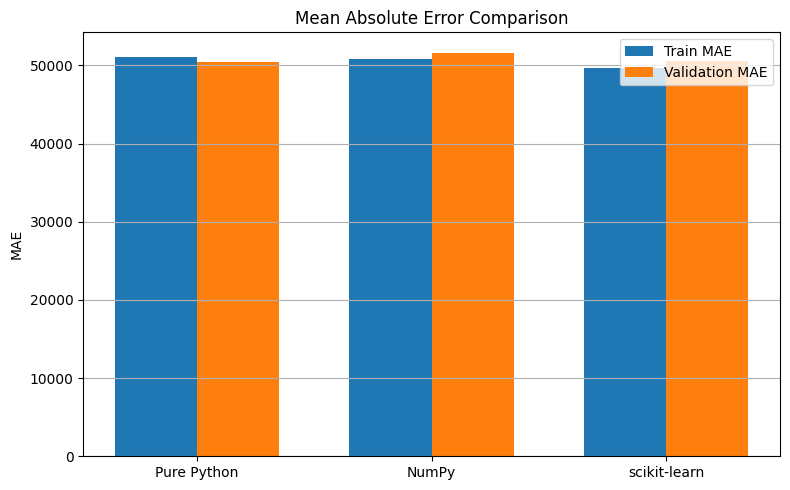

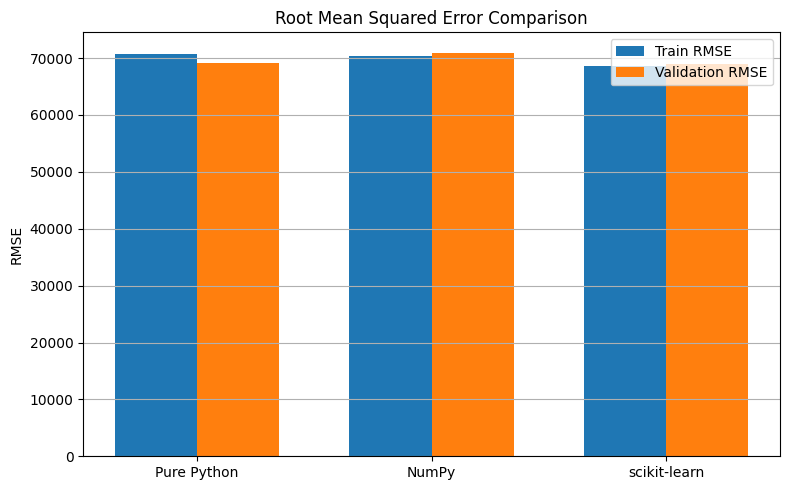

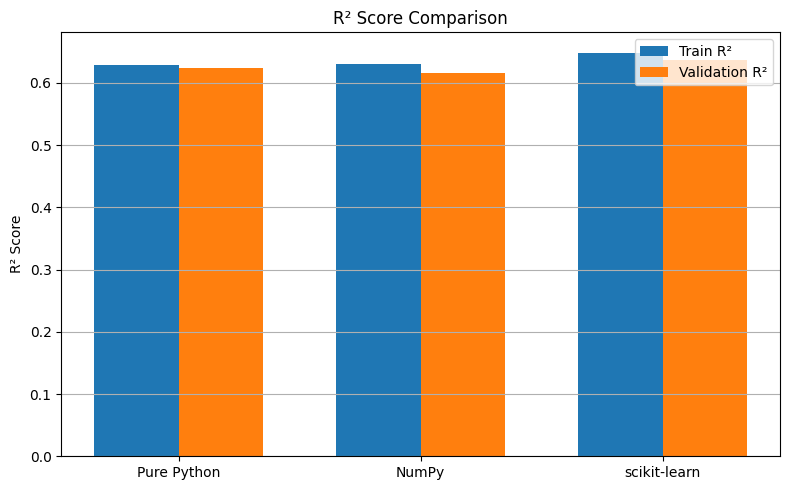

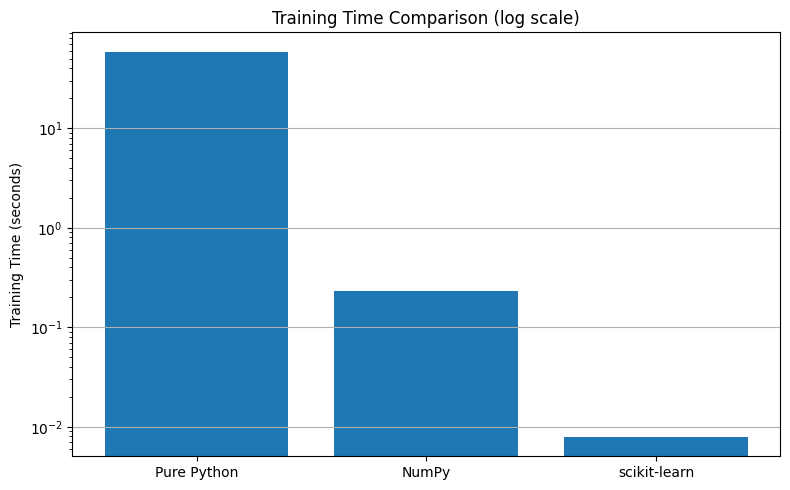

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Labels for the models
models = ['Pure Python', 'NumPy', 'scikit-learn']

# Metrics from your results
train_mae = [51007.40, 50763.92, 49627.52]
val_mae = [50467.59, 51639.05, 50613.68]

train_rmse = [70751.00, 70356.61, 68550.15]
val_rmse = [69183.04, 70975.48, 69013.62]

train_r2 = [0.6284, 0.6300, 0.6487]
val_r2 = [0.6242, 0.6158, 0.6368]

train_time = [58.88, 0.23, 0.0079]

x = np.arange(len(models))  # label locations
width = 0.35  # bar width

# Plot MAE
fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, train_mae, width, label='Train MAE')
rects2 = ax.bar(x + width/2, val_mae, width, label='Validation MAE')

ax.set_ylabel('MAE')
ax.set_title('Mean Absolute Error Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Plot RMSE
fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, train_rmse, width, label='Train RMSE')
rects2 = ax.bar(x + width/2, val_rmse, width, label='Validation RMSE')

ax.set_ylabel('RMSE')
ax.set_title('Root Mean Squared Error Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Plot R²
fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, train_r2, width, label='Train R²')
rects2 = ax.bar(x + width/2, val_r2, width, label='Validation R²')

ax.set_ylabel('R² Score')
ax.set_title('R² Score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()

# Plot training time (log scale)
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(models, train_time)
ax.set_ylabel('Training Time (seconds)')
ax.set_yscale('log')
ax.set_title('Training Time Comparison (log scale)')
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()